### IMPORT NECESSARY FILES

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import joblib

### Load and Analyze the Data

In [63]:
# Load Data
df = pd.read_csv('Dataset01-Employee_Attrition.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [64]:
df.shape

(14999, 10)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [66]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [67]:
df.Work_accident.value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [68]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### Droping The Duplicate Coloumn

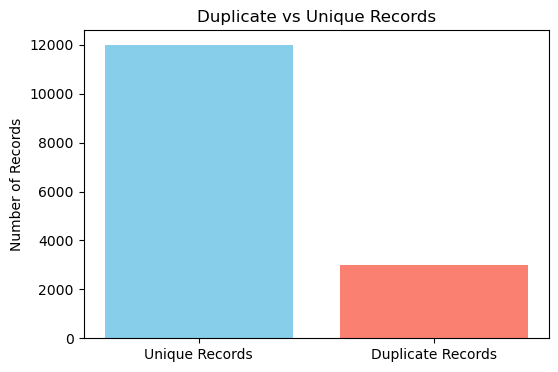

In [69]:
duplicate_count = df.duplicated().sum()
unique_count = len(df) - duplicate_count

# Create data for graph
labels = ['Unique Records', 'Duplicate Records']
values = [unique_count, duplicate_count]
colors = ['skyblue', 'salmon']

# Plot
plt.figure(figsize=(6,4))
plt.bar(labels, values, color=colors)
plt.title("Duplicate vs Unique Records")
plt.ylabel("Number of Records")
plt.show()


In [70]:
df.duplicated().sum()

3008

In [71]:
df.drop_duplicates(inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


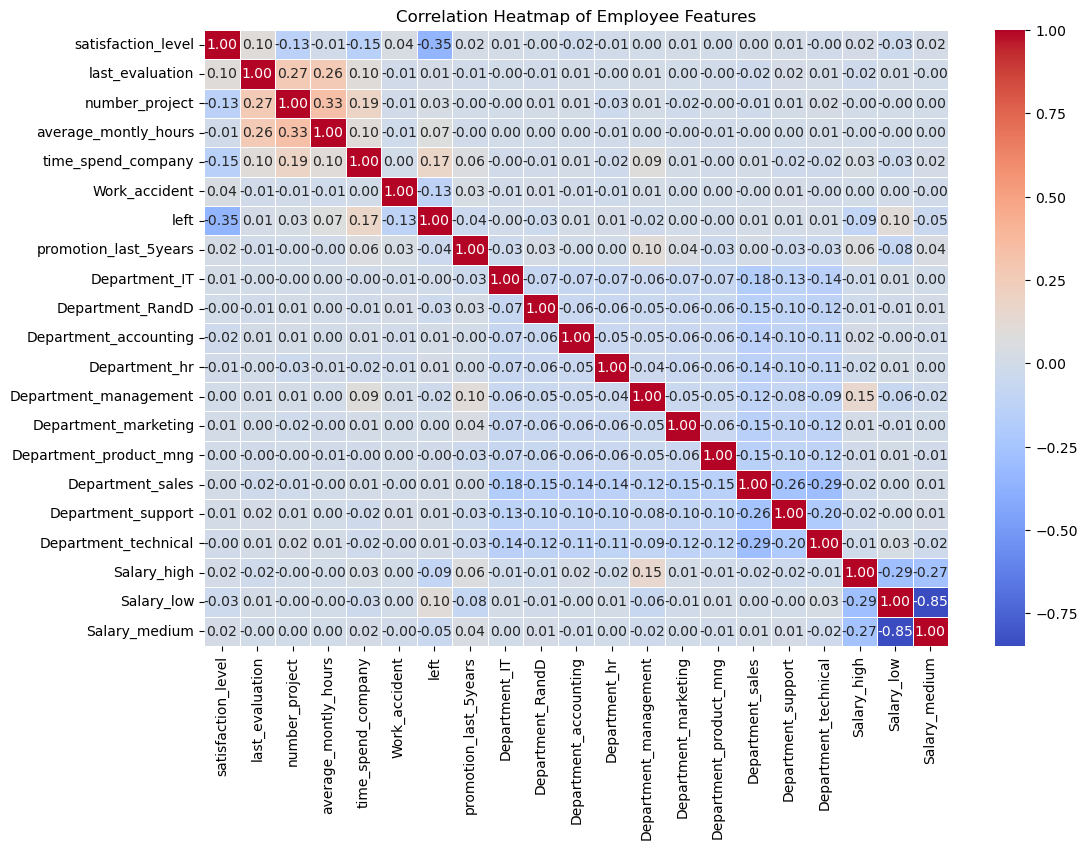

In [90]:
# Only use numerical columns
corr = df.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Employee Features")
plt.show()

### One Hot Encoding

In [72]:
# One-hot encode categorical features
df = pd.concat([
    df.drop(columns=["Department", "salary"]),
    pd.get_dummies(df["Department"], prefix="Department", dtype=int),
    pd.get_dummies(df["salary"], prefix="Salary", dtype=int)
], axis=1)


In [73]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,Salary_high,Salary_low,Salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


### Analyzing the Data with graphs

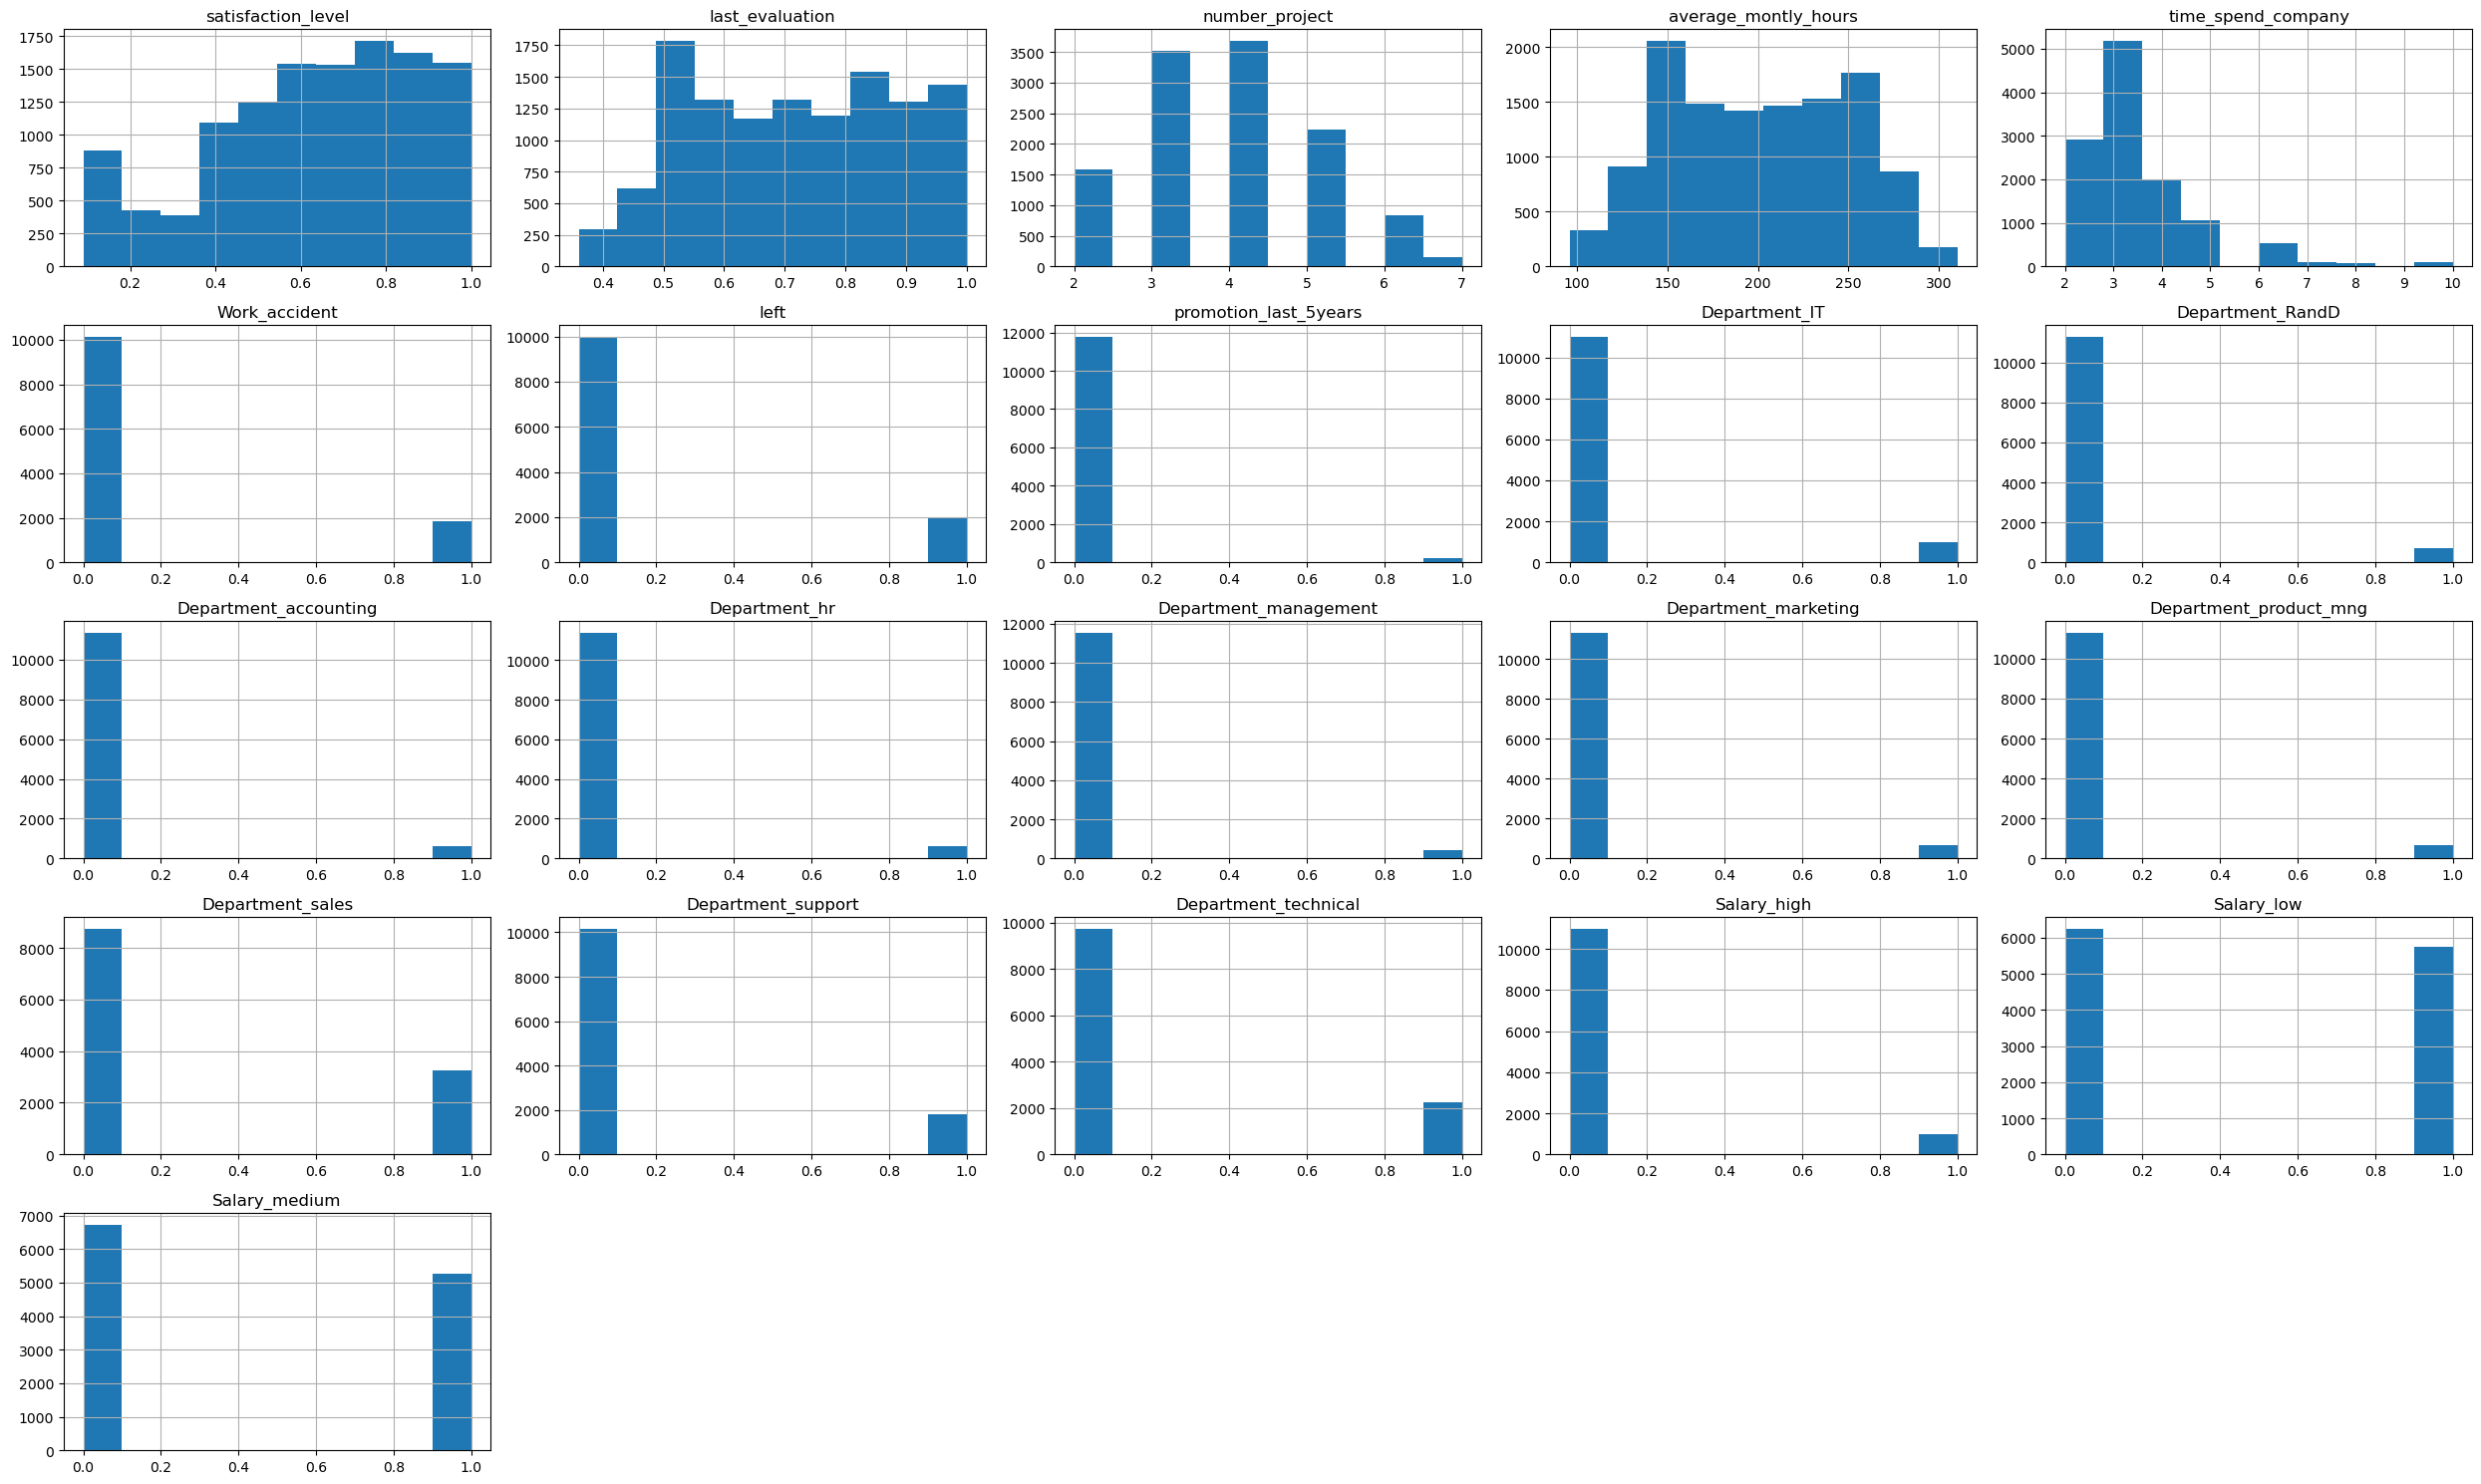

In [74]:
df.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

In [75]:
# Define features and target
X = df.drop("left", axis=1)
y = df["left"]

### Traning And Testing the Data

In [76]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE(Synthetic Minority Over-sampling Technique) - For  imbalance data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [77]:
# 👉 Check distribution BEFORE SMOTE
print("🔴 Class Distribution BEFORE SMOTE:")
print(y_train.value_counts())

# 👉 Check distribution AFTER SMOTE
print("\n🟢 Class Distribution AFTER SMOTE:")
print(pd.Series(y_resampled).value_counts())

🔴 Class Distribution BEFORE SMOTE:
left
0    8002
1    1590
Name: count, dtype: int64

🟢 Class Distribution AFTER SMOTE:
left
0    8002
1    8002
Name: count, dtype: int64


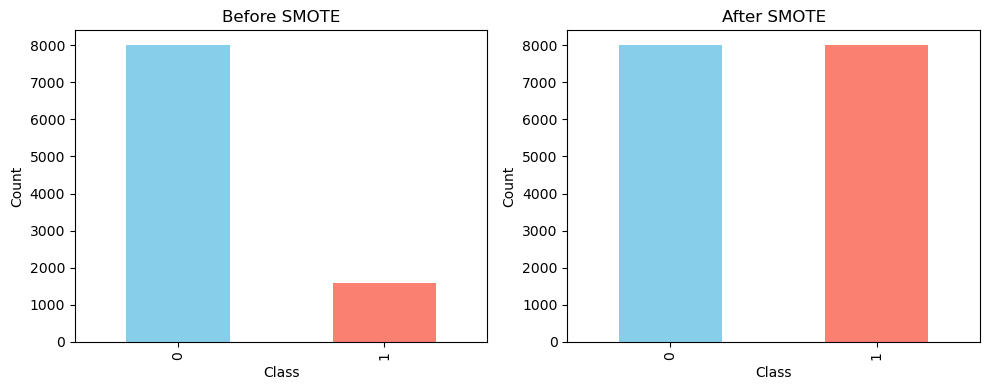

In [78]:
# Bar plot before and after
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Before
y_train.value_counts().plot(kind='bar', ax=axs[0], title='Before SMOTE', color=['skyblue', 'salmon'])
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

# After
pd.Series(y_resampled).value_counts().plot(kind='bar', ax=axs[1], title='After SMOTE', color=['skyblue', 'salmon'])
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Appling GridSearchCV - For Best Hyperparameters

In [80]:

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=classifier,
                            param_grid=param_grid,
                            cv=5, 
                            scoring='f1',
                            n_jobs=-1, 
                            verbose=1)

grid_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [81]:
best_model = grid_search.best_estimator_

print("Best Parameters Found:\n", grid_search.best_params_)

Best Parameters Found:
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Predict Probabilities & Apply Threshold

In [82]:
# To control Recall vs Precision
y_probs = best_model.predict_proba(X_test)[:, 1]
threshold = 0.4  # Reduce to increase recall
y_pred_custom = (y_probs >= threshold).astype(int)


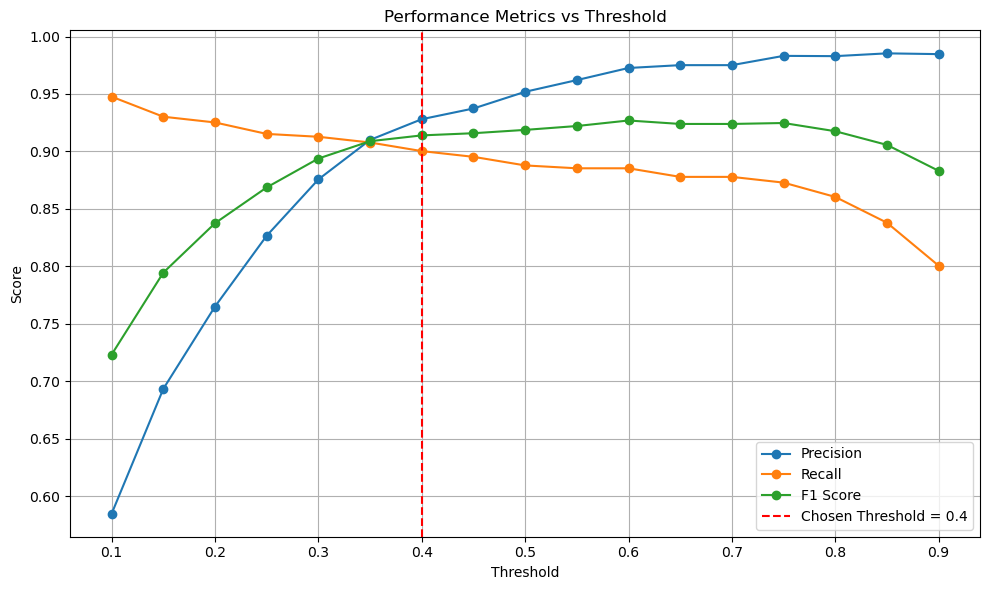

In [91]:
# Predict probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Prepare thresholds from 0.1 to 0.9
thresholds = np.arange(0.1, 0.91, 0.05)
precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1s.append(f1_score(y_test, y_pred_thresh))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1s, label='F1 Score', marker='o')
plt.axvline(x=0.4, color='red', linestyle='--', label='Chosen Threshold = 0.4')
plt.title('Performance Metrics vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Evaluation

In [83]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_custom, digits=2))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1998
           1       0.93      0.90      0.91       401

    accuracy                           0.97      2399
   macro avg       0.95      0.94      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [84]:
cm = confusion_matrix(y_test, y_pred_custom)
acc = accuracy_score(y_test, y_pred_custom)
prec = precision_score(y_test, y_pred_custom)
rec = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print("\n=== Evaluation Metrics ===")
print(f"Accuracy Score   : {acc * 100:.2f}%")
print(f"Precision Score  : {prec * 100:.2f}%")
print(f"Recall Score     : {rec * 100:.2f}%")
print(f"F1 Score         : {f1 * 100:.2f}%")


=== Evaluation Metrics ===
Accuracy Score   : 97.17%
Precision Score  : 92.80%
Recall Score     : 90.02%
F1 Score         : 91.39%


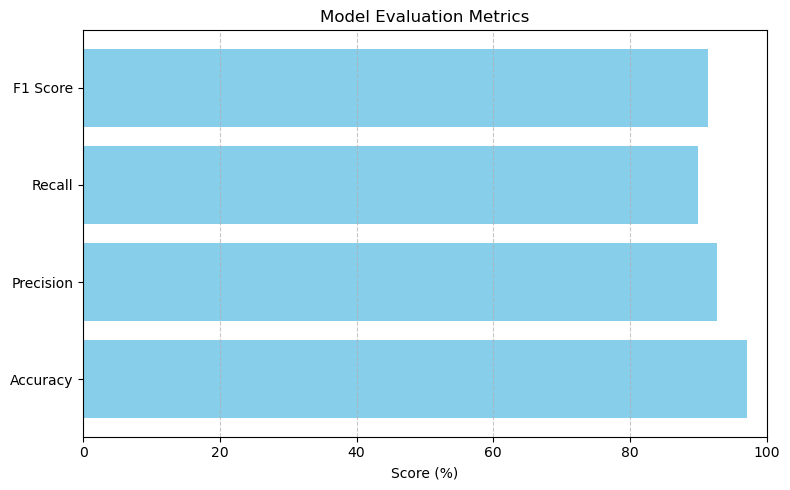

In [93]:
metrics = {
    'Accuracy': 97.17,
    'Precision': 92.80,
    'Recall': 90.02,
    'F1 Score': 91.39
}

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(list(metrics.keys()), list(metrics.values()), color='skyblue')
plt.xlabel('Score (%)')
plt.title('Model Evaluation Metrics')
plt.xlim(0, 100)  # since it's in percentage
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

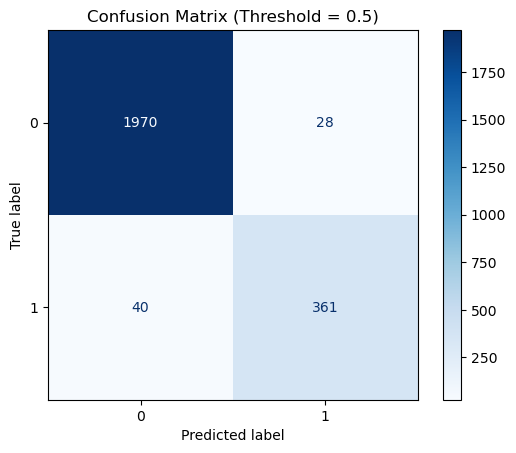

In [85]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_custom, cmap="Blues")
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.show()

### Feature Importance

/var/folders/dw/7k0hkwcn7rs6c_t7gr9plqvh0000gp/T/ipykernel_94120/3177555662.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette="viridis")


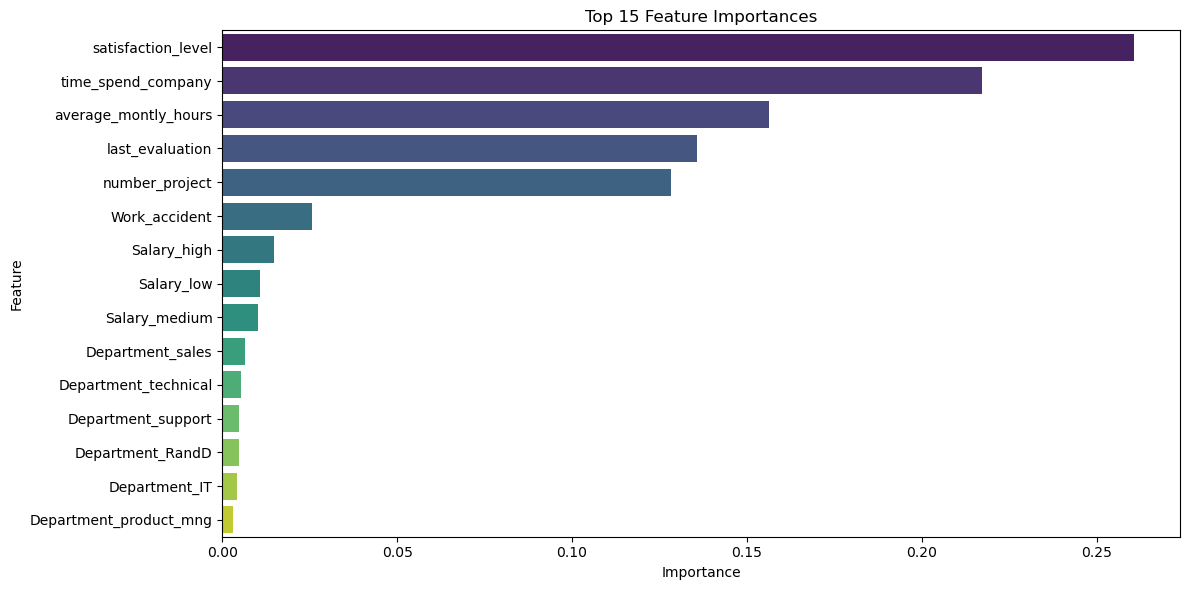

In [86]:
importances = best_model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette="viridis")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

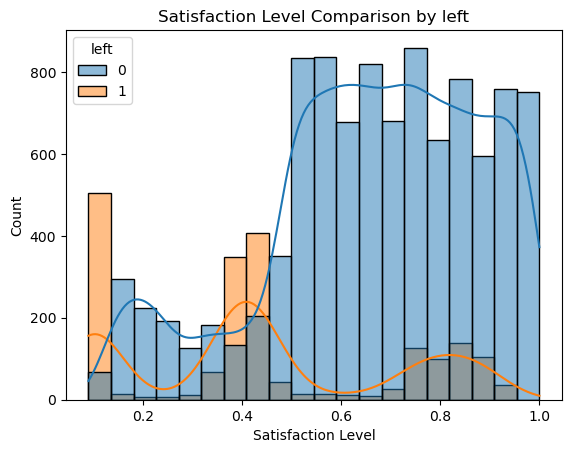

In [87]:
sns.histplot(data=df, x='satisfaction_level', hue='left', bins=20, kde=True)
plt.title("Satisfaction Level Comparison by left")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

In [88]:
# Save Model and Columns
joblib.dump(best_model, "final_model.joblib")
joblib.dump(list(X.columns), "feature_list.joblib")


['feature_list.joblib']